In [30]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import funciones_MBA as fMBA
import seaborn as sns

In [11]:
#Parámetros
n_neu = 50
pasos = 750
peso_inicial = 10

In [12]:
def entrenar(nucleo, coclea, largo_estim, cantidad_estim):
    
    lista_vertices = []
    for i in range(pasos):

        estim = fMBA.generar_estimulos_largo_partido(coclea, largo_estim, cantidad_estim)

        edges_estimulo = fMBA.vertices_estimulo(nucleo, estim)

        fMBA.actualizar_pesos(nucleo, edges_estimulo, estim)

        fMBA.eliminar_pesos_negativos(nucleo)

        lista_vertices.append(len(list(nucleo.edges())))
    
    return lista_vertices

In [20]:
def x_tau_medio (lista_vertices):
    y = (lista_vertices[0] + lista_vertices[-1]) / 2 
    dif = []
    for i in lista_vertices:
        dif.append(abs(i-y))
    return dif.index(min(dif))

{(1, 4): 68, (1, 8): 33, (1, 16): 20, (2, 4): 71, (2, 8): 41, (2, 16): 27, (4, 4): 77, (4, 8): 43, (4, 16): 31}


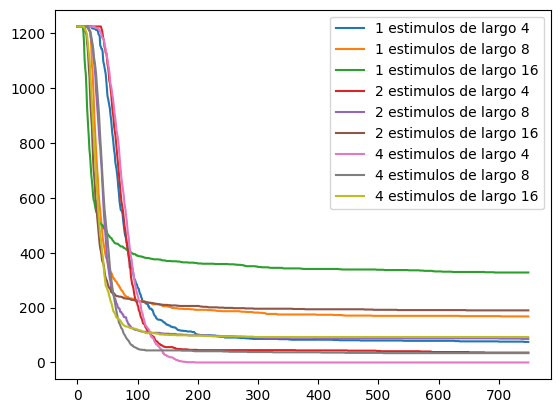

In [21]:
dicc_tau_medio={}

for cantidad_estim in [1, 2, 4]:
    for largo_estim in [4, 8, 16]:
        nucleo, coclea = fMBA.iniciar_red(n_neu, peso_inicial)
        lista_vertices = entrenar(nucleo, coclea, largo_estim, cantidad_estim)
        dicc_tau_medio[(cantidad_estim, largo_estim)] = x_tau_medio(lista_vertices)
        plt.plot(lista_vertices, label=f'{cantidad_estim} estimulos de largo {largo_estim}')
plt.legend()
print(dicc_tau_medio)

<Axes: >

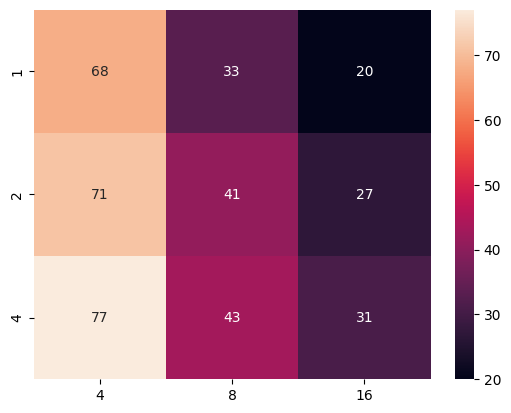

In [31]:
# Crear un DataFrame a partir del diccionario
df = pd.DataFrame.from_dict(dicc_tau_medio, orient='index', columns=['Value'])
df.index = pd.MultiIndex.from_tuples(df.index, names=["Row", "Column"])
df = df.unstack(level='Column')

# Visualizar el DataFrame resultante
df.columns = df.columns.droplevel(0)  # Eliminar niveles innecesarios
df = df.rename_axis(index=None, columns=None)  # Eliminar nombres de los ejes

df

sns.heatmap(df, annot=True)